In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("DS Classification Case Data.csv")

C:\Users\qmind\AppData\Local\Temp\ipykernel_8124\3404481124.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("DS Classification Case Data.csv")


Veriye genel bakış:

In [3]:
df.head()

,payment_id,payment_date,payment_type,payment_channel,payment_group,price,payment_currency,merchant_id,payment_source_id,installment,...,merchant_onboarding_source,merchant_source_name,settlement_period,blockage_day_count,merchant_work_beginning_date,merchant_city,merchant_company_type,merchant_register_date,merchant_segment,is_fraud_transaction
0,2334829,2024-09-03 14:44:15.941,CARD_PAYMENT,MOBILE,SUBSCRIPTION,1979.308310,TRY,2,1.0,1,...,MerchantOnboardingSource_1,MerchantSource_3,1,15,2015-07-13,İstanbul,MerchantCompanyType_2,2016-02-12 14:06:21.000,MerchantSegment_1,0
1,2334753,2024-09-03 14:40:30.641,CARD_PAYMENT,MOBILE,SUBSCRIPTION,2103.926111,TRY,2,1.0,1,...,MerchantOnboardingSource_1,MerchantSource_3,1,15,2015-07-13,İstanbul,MerchantCompanyType_2,2016-02-12 14:06:21.000,MerchantSegment_1,0
2,1148645,2024-07-17 21:50:05.865,CARD_PAYMENT,WEB,PRODUCT,160.762358,TRY,34,1.0,1,...,MerchantOnboardingSource_1,MerchantSource_2,1,7,2020-09-22,İstanbul,MerchantCompanyType_2,2021-02-19 14:59:50.000,MerchantSegment_1,0
3,393595,2024-06-15 22:41:50.741,CARD_PAYMENT,WEB,PRODUCT,1.078942,TRY,34,1.0,1,...,MerchantOnboardingSource_1,MerchantSource_2,1,7,2020-09-22,İstanbul,MerchantCompanyType_2,2021-02-19 14:59:50.000,MerchantSegment_1,0
4,1095949,2024-07-15 22:15:06.646,CARD_PAYMENT,WEB,PRODUCT,160.762358,TRY,34,1.0,1,...,MerchantOnboardingSource_1,MerchantSource_2,1,7,2020-09-22,İstanbul,MerchantCompanyType_2,2021-02-19 14:59:50.000,MerchantSegment_1,0


In [4]:
df.shape

(3120010, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120010 entries, 0 to 3120009
Data columns (total 33 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   payment_id                    int64  
 1   payment_date                  object 
 2   payment_type                  object 
 3   payment_channel               object 
 4   payment_group                 object 
 5   price                         float64
 6   payment_currency              object 
 7   merchant_id                   int64  
 8   payment_source_id             float64
 9   installment                   int64  
 10  card_type                     object 
 11  card_association              object 
 12  card_family                   object 
 13  bin_number                    int64  
 14  last_four_digits              int64  
 15  is_threeds                    int64  
 16  buyer_name                    object 
 17  buyer_surname                 object 
 18  buyer_email           

In [6]:
df.describe().T.round(2) #derli toplu bir describe

,count,mean,std,min,25%,50%,75%,max
payment_id,3120010.0,1560005.50,900669.45,1.00,780003.25,1560005.50,2340007.75,3.120010e+06
price,3120010.0,1783.29,6628.79,0.01,90.63,160.76,517.88,2.121984e+06
merchant_id,3120010.0,19.52,21.39,1.00,2.00,2.00,34.00,7.700000e+01
payment_source_id,3120000.0,4297562.17,20283383.65,1.00,1.00,1.00,1.00,1.000311e+08
installment,3120010.0,1.31,1.27,0.00,1.00,1.00,1.00,1.200000e+01
bin_number,3120010.0,521327.64,286982.75,100111.00,220245.00,596077.00,760208.00,9.996770e+05
last_four_digits,3120010.0,5454.65,2599.04,1000.00,3209.00,5437.00,7657.00,9.998000e+03
is_threeds,3120010.0,0.59,0.49,0.00,0.00,1.00,1.00,1.000000e+00
settlement_period,3120010.0,1.10,0.32,1.00,1.00,1.00,1.00,3.000000e+00
blockage_day_count,3120010.0,9.87,5.14,0.00,7.00,7.00,15.00,3.000000e+01


Tabloyu sadeleştirmek adına modelde kesin kullanmayacağımız değişkenleri çıkartıyorum.

In [7]:
df.drop(columns= ["payment_id", "buyer_name", "buyer_surname", "buyer_email","buyer_gsm"], inplace=True)

In [8]:
df["payment_source_id"].nunique() #veriden çıkartmayacağım.

30

In [9]:
df.isnull().sum()

payment_date                        0
payment_type                        0
payment_channel                     0
payment_group                     139
price                               0
payment_currency                    0
merchant_id                         0
payment_source_id                  10
installment                         0
card_type                       92285
card_association                91512
card_family                     92289
bin_number                          0
last_four_digits                    0
is_threeds                          0
buyer_city                          4
buyer_country                       0
merchant_type                       0
merchant_onboarding_source          0
merchant_source_name                0
settlement_period                   0
blockage_day_count                  0
merchant_work_beginning_date    60302
merchant_city                       0
merchant_company_type               0
merchant_register_date              0
merchant_seg

In [10]:
df["card_type"].value_counts() #(Boş olanlar yurt dışı kartı olarak değerlendirilecek)

card_type
CREDIT_CARD    1615463
DEBIT_CARD     1412258
OTHER                4
Name: count, dtype: int64

Boş verileri doldurmadan önce value_counts() ile değerlerini inceledim.

Boş verilerin doldurulması:

In [11]:
df["card_type"].fillna("foreign", inplace=True) #case raporunda böyle belirtilmiş
df["card_association"].fillna("other", inplace=True)
df["card_family"].fillna("other", inplace=True)
df["buyer_city"].fillna(df["buyer_city"].mode()[0], inplace=True)
df["payment_source_id"].fillna(df["payment_source_id"].mode()[0], inplace=True)
df["merchant_work_beginning_date"].fillna(df["merchant_work_beginning_date"].mode()[0], inplace=True)
df["payment_group"].fillna(df["payment_group"].mode()[0], inplace=True)


C:\Users\qmind\AppData\Local\Temp\ipykernel_8124\1555005374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["card_type"].fillna("foreign", inplace=True) #case raporunda böyle belirtilmiş
C:\Users\qmind\AppData\Local\Temp\ipykernel_8124\1555005374.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [12]:
df.isnull().sum()

payment_date                    0
payment_type                    0
payment_channel                 0
payment_group                   0
price                           0
payment_currency                0
merchant_id                     0
payment_source_id               0
installment                     0
card_type                       0
card_association                0
card_family                     0
bin_number                      0
last_four_digits                0
is_threeds                      0
buyer_city                      0
buyer_country                   0
merchant_type                   0
merchant_onboarding_source      0
merchant_source_name            0
settlement_period               0
blockage_day_count              0
merchant_work_beginning_date    0
merchant_city                   0
merchant_company_type           0
merchant_register_date          0
merchant_segment                0
is_fraud_transaction            0
dtype: int64

In [13]:
df["is_fraud_transaction"].value_counts() #hedef değişkenin sınıf dağılımına bakalım:

is_fraud_transaction
0    3110181
1       9829
Name: count, dtype: int64

Aşırı bir dengesizlik var. Bu durumda feature engineering üzerinde biraz çalışmalıyız:


Feature Engineering:

In [14]:
# Şimdiye kadar iki tane date içeren sütunumuz vardı. Onları datetime formatına çevirelim:
df["payment_date"] = pd.to_datetime(df["payment_date"])
df["merchant_work_beginning_date"] = pd.to_datetime(df["merchant_work_beginning_date"])

#şimdi bu datetime'ları kullanarak merchant date ile payment date arasındaki gün farkına bakalım:
df["merchant_islem_days"] = (df["payment_date"] - df["merchant_work_beginning_date"]).dt.days


In [15]:
# payment_hour diye bir değişken oluşturuyorum, çünkü gece yapılan işlemler frauda daha yatkın olabilir.
df["payment_hour"] = df["payment_date"].dt.hour
#eğer gece işlemiyse 
df["is_night"] = df["payment_hour"].apply(lambda x: 1 if (x >= 0 and x <= 6) else 0)
# payment day
df["payment_day"] = df["payment_date"].dt.dayofweek
#işlem hafta sonu mu yapıldı?
df["is_weekend"] = (df["payment_day"] >= 5).astype(int)

In [16]:
# yüksek değerli işlem alarmı
df["is_high_price"] = (df["price"] > 10000).astype(int)
# 3DS yok ve yüksek fiyatlı işlem alarmı
df["3ds_yok_high_price"] = ((df["is_threeds"] == 0) & (df["price"] > 5000)).astype(int)


In [17]:
# kart numarasının ilk 6 hanesi ile son 4 hanesini birleştirip unique bir card id elde ediyorum.
df["card_id"] = df["bin_number"].astype(str) + df["last_four_digits"].astype(str)


In [18]:
#taksit başına işlem tutarı ne kadar?
df["price_per_installment"] = df["price"] / (df["installment"] + 1)


df'in son haline bakalım:

In [19]:
df.head()

,payment_date,payment_type,payment_channel,payment_group,price,payment_currency,merchant_id,payment_source_id,installment,card_type,...,is_fraud_transaction,merchant_islem_days,payment_hour,is_night,payment_day,is_weekend,is_high_price,3ds_yok_high_price,card_id,price_per_installment
0,2024-09-03 14:44:15.941,CARD_PAYMENT,MOBILE,SUBSCRIPTION,1979.308310,TRY,2,1.0,1,CREDIT_CARD,...,0,3340,14,0,1,0,0,0,4870172193,989.654155
1,2024-09-03 14:40:30.641,CARD_PAYMENT,MOBILE,SUBSCRIPTION,2103.926111,TRY,2,1.0,1,CREDIT_CARD,...,0,3340,14,0,1,0,0,0,4870172193,1051.963055
2,2024-07-17 21:50:05.865,CARD_PAYMENT,WEB,PRODUCT,160.762358,TRY,34,1.0,1,DEBIT_CARD,...,0,1394,21,0,2,0,0,0,8174728044,80.381179
3,2024-06-15 22:41:50.741,CARD_PAYMENT,WEB,PRODUCT,1.078942,TRY,34,1.0,1,DEBIT_CARD,...,0,1362,22,0,5,1,0,0,8174728044,0.539471
4,2024-07-15 22:15:06.646,CARD_PAYMENT,WEB,PRODUCT,160.762358,TRY,34,1.0,1,DEBIT_CARD,...,0,1392,22,0,0,0,0,0,8174728044,80.381179


Feature engineering sonrası modele girmeyecek değişkenleri çıkartalım:

In [20]:
df.drop(columns=["merchant_id","payment_date","merchant_work_beginning_date" ,"merchant_register_date", "card_id"], inplace=True)

Sayısal değişkenler arasındaki korelasyonu inceliyorum:

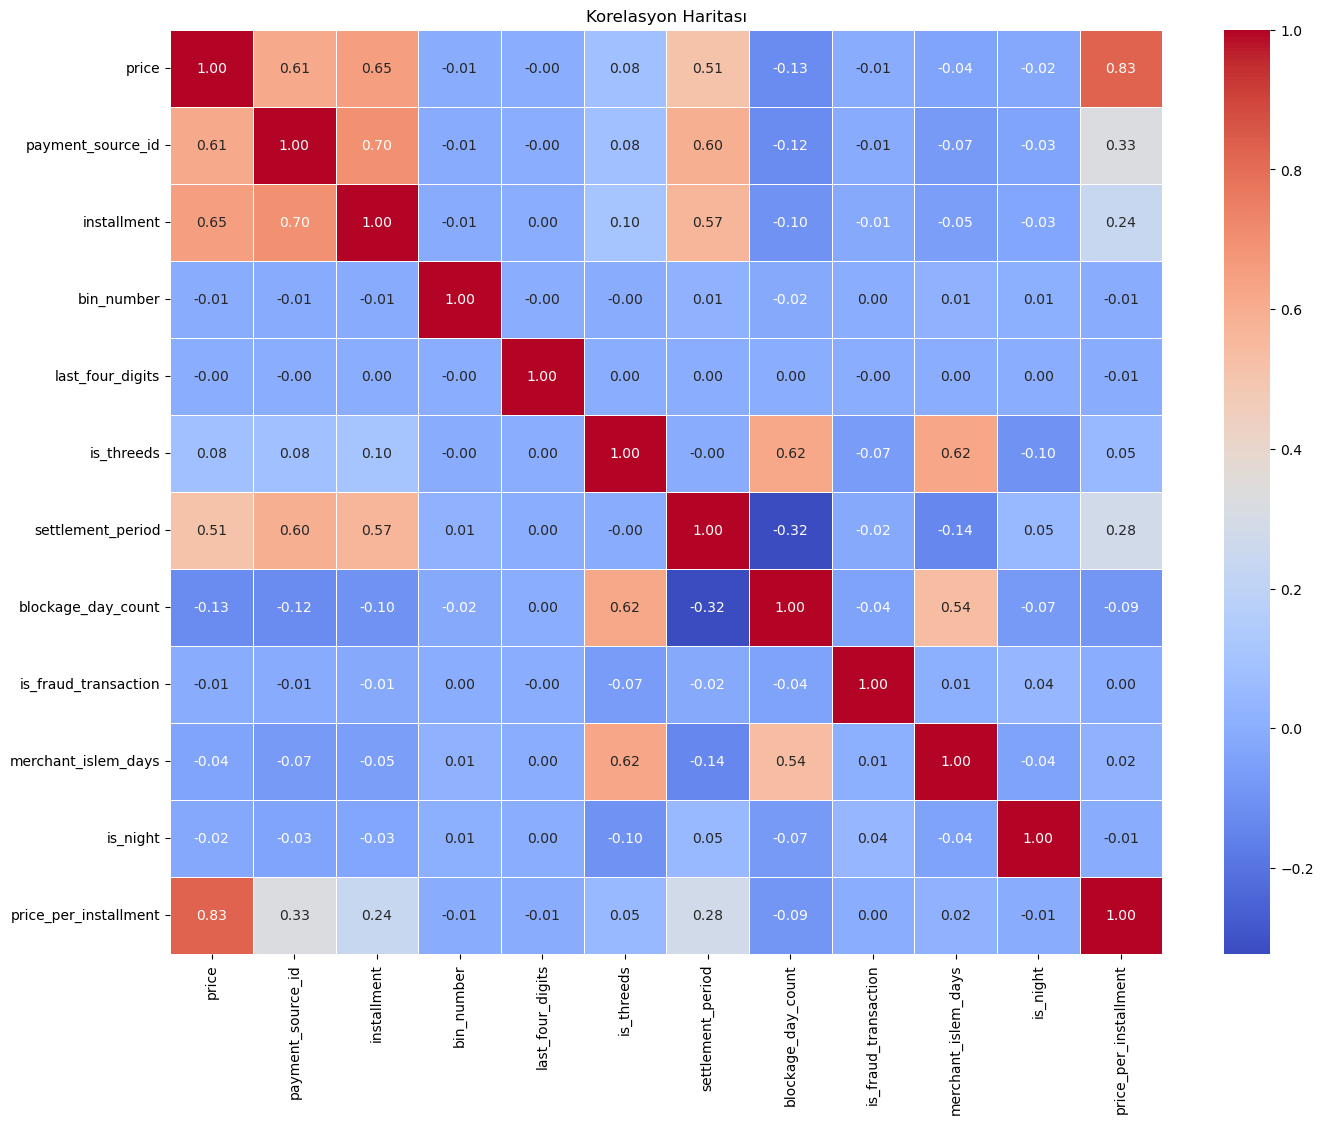

In [21]:
sayısal_sütunlar = df.select_dtypes(include=["int64", "float64"]).columns

corr_matrix = df[sayısal_sütunlar].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Korelasyon Haritası")
plt.show()


Özellikle hedef değişkenimizle yüksek korele olan bir sütun yok. Bu lineer ilişkinin zayıf olduğunu ve ağaçlı modellere yönelmemiz gerektiğini söyler. Bu haritaya göre herhangi bir değişkenimi çıkarmıyorum.

In [22]:
#label encoding yapalım:

from sklearn.preprocessing import LabelEncoder

kategorikler = df.select_dtypes(include="object").columns

le = LabelEncoder()
for col in kategorikler:
    df[col] = le.fit_transform(df[col].astype(str))


Modele doğru:

In [23]:
y = df["is_fraud_transaction"]
x=df.drop("is_fraud_transaction", axis=1)

Aşırı dengesiz bir sınıflandırma problemiyle karşı karşıyayız.
Bu problemi aşmak için SMOTE, class_weight=balanced ve cross val. yapıp sonuclarda F1 skoruna odaklanacağız.

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
import numpy as np

# SMOTE ve model
smote = SMOTE(random_state=42)
model = LGBMClassifier(random_state=42)

# Pipeline
pipeline = Pipeline([
    ("smote", smote),
    ("lgbm", model)
])

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrik listeleri
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Fold bazlı loop
for train_idx, test_idx in skf.split(x, y):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    y_proba = pipeline.predict_proba(x_test)[:, 1]

    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_proba))

# Ortalama skorlar
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall:    {np.mean(recall_scores):.4f}")
print(f"F1 Score:  {np.mean(f1_scores):.4f}")
print(f"ROC AUC:   {np.mean(roc_auc_scores):.4f}")


[LightGBM] [Info] Number of positive: 2488144, number of negative: 2488144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.196569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2046
[LightGBM] [Info] Number of data points in the train set: 4976288, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 2488145, number of negative: 2488145
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.185354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2023
[LightGBM] [Info] Number of data points in the train set: 4976290, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> i

Bir treshold değeri belirledim (0.7). Yani model, fraud olasılığı ≥ 0.7 olan işlemleri 1 yani fraud olarak etiketleyecek, şimdi sonuçlara bakalım:


treshold ayarlaması yapılmış hali: (Yine Lightgbm modeli)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier

# SMOTE ve model
smote = SMOTE(random_state=42)
model = LGBMClassifier(random_state=42)

# Pipeline
pipeline = Pipeline([
    ("smote", smote),
    ("lgbm", model)
])

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrik listeleri
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

threshold = 0.7

for train_idx, test_idx in skf.split(x, y):
    x_train, x_test = x.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    pipeline.fit(x_train, y_train)
    
    y_proba = pipeline.predict_proba(x_test)[:, 1]
    
    y_pred = (y_proba >= threshold).astype(int)

    # Metrikler
    precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
    roc_auc_scores.append(roc_auc_score(y_test, y_proba))

# Ortalama skorlar
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall:    {np.mean(recall_scores):.4f}")
print(f"F1 Score:  {np.mean(f1_scores):.4f}")
print(f"ROC AUC:   {np.mean(roc_auc_scores):.4f}")


[LightGBM] [Info] Number of positive: 2488144, number of negative: 2488144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.715134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2046
[LightGBM] [Info] Number of data points in the train set: 4976288, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 2488145, number of negative: 2488145
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.367905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2023
[LightGBM] [Info] Number of data points in the train set: 4976290, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> i

treshold ayarlaması sonucları ciddi oranda düzeltti. Şimdi xgboost deneyelim:

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

smote = SMOTE(random_state=10)
model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss",  # uyarı engellemek için
    n_jobs=2
)

pipeline = Pipeline([
    ("smote", smote),
    ("xgb", model)
])

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrik listeleri
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

threshold = 0.7


for train_idx, test_idx in skf.split(x, y):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(x_train, y_train)
    y_proba = pipeline.predict_proba(x_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)  

    precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
    roc_auc_scores.append(roc_auc_score(y_test, y_proba))

# Ortalama skorlar
print("XGBoost Model Sonuçları:")
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall:    {np.mean(recall_scores):.4f}")
print(f"F1 Score:  {np.mean(f1_scores):.4f}")
print(f"ROC AUC:   {np.mean(roc_auc_scores):.4f}")


c:\Users\qmind\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:07:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\qmind\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:08:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\qmind\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:09:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\qmind\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:10:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

XGBoost Model Sonuçları:
Precision: 0.1444
Recall:    0.7232
F1 Score:  0.2408
ROC AUC:   0.9775


xgboost modeliyle daha iyi sonuç elde ettik. bir de catboost deneyelim:

In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from catboost import CatBoostClassifier
import numpy as np

# SMOTE ve CatBoost model
smote = SMOTE(random_state=10)
model = CatBoostClassifier(
    random_state=42,
    verbose=0,       # Çıktıyı sade tutmak için
    iterations=100,  # Eğitim süresini kontrol altında tutmak için
    thread_count=2
)

# Pipeline
pipeline = Pipeline([
    ("smote", smote),
    ("catboost", model)
])

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrik listeleri
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# 🔥 Custom threshold belirle
threshold = 0.7

# Fold bazlı loop
for train_idx, test_idx in skf.split(x, y):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(x_train, y_train)
    y_proba = pipeline.predict_proba(x_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
    roc_auc_scores.append(roc_auc_score(y_test, y_proba))

# Ortalama skorlar
print("CatBoost Model Sonuçları:")
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall:    {np.mean(recall_scores):.4f}")
print(f"F1 Score:  {np.mean(f1_scores):.4f}")
print(f"ROC AUC:   {np.mean(roc_auc_scores):.4f}")


CatBoost Model Sonuçları:
Precision: 0.1248
Recall:    0.7324
F1 Score:  0.2133
ROC AUC:   0.9764


Şimdi sadece oversampling (SMOTE) kullanmadan SMOTE'a ek olarak akıllı undersampling yapan SMOTEENN yöntemini uygulanabilir. Ancak veri boyutunun çok büyük olması nedeniyle bu yöntem pratikte uygulanabilir olmaktan çıktı.

**Final model**: XGBoost. En iyi F1 skorunu ve presicion değerini Xgboost ile aldık. Model seçimimizi **Xgboost** yapıyoruz.

c:\Users\qmind\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:33:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


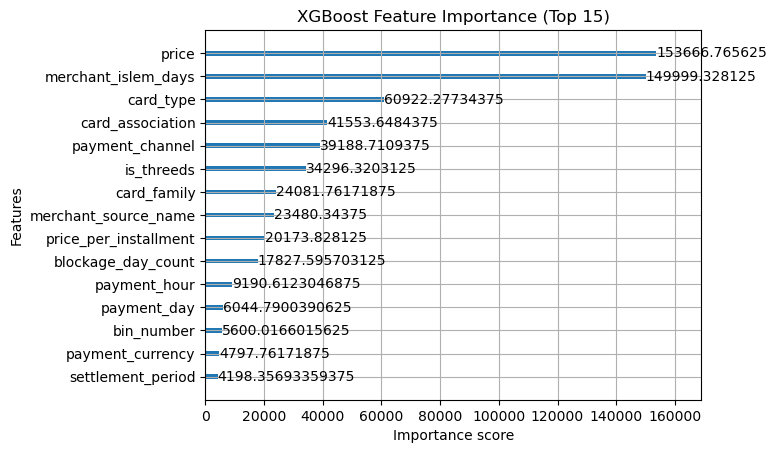

In [35]:
# Feature Importance yapalım:

from xgboost import plot_importance

# Eğitilmiş model (örnek)
model = XGBClassifier(
    objective="binary:logistic",  # Sınıflandırma olduğunu net belirtmiş olursun
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

model.fit(x_train, y_train)

# 📊 Feature importance
plot_importance(model, max_num_features=15, importance_type="gain")
plt.title("XGBoost Feature Importance (Top 15)")
plt.show()


--Price 1. sırada çıkmış. yani price'ın yüksek olması fraud olabilir sinyali veriyor.
--2. sırada merchant_islem_days cıkmış yani satıcının sisteme yeni girmiş olması fraud riski taşıyor.
--Kredi mi debit mi olması fraud olasılığını etkiliyor.


Modelin en çok güvendiği değişkenler price, merchant_islem_days ve card_type gibi hem işlem tutarına hem de satıcı güvenilirliğine işaret eden alanlar oldu. Bu, modelin fraud’un davranışsal ve finansal izlerini doğru öğrendiğini gösteriyor.